KNN으로 붓꽃 분류 하기
- UCI 데이터셋 다운로드
- pandas로 읽기
- 입력(x: 꽃잎과 꽃받침의 길이 너비)과 출력(y: 품종) 분리
- 150 개의 인스턴스(샘플), 학습용(75%), 테스트용(25%) 분리
- K(k:3~5개 정도)NN모델을 선정
- 목표: 테스트 샘플의 분류 정확도 높이기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('iris.data')
df.shape

(149, 5)

In [6]:
df.head()    # 헤더가 없어서 첫번째 데이터가 헤더가 됨

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
df = pd.read_csv('iris.data', header=None)     # 헤더가 없음을 명시
df.shape

(150, 5)

In [8]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()         # 누락값이나 컬럼형식 확인, 숫자 형태(int/float)로 변환해야 할 지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### 입력(X: 꽃잎과 꽃받침의 길이 너비)과 출력(Y: 품종) 분리

In [85]:
X=df.iloc[:,:4]
y=df.iloc[:,:-1]
X.shape, y.shape

((10, 4), (10, 7),               종가   전일비   등락률    거래량
 일자                                 
 19.07.02  276.99  0.28 -0.10  22361
 19.07.01  277.27  0.23 -0.08  74357
 19.06.28  277.50  0.25 -0.09  67598
 19.06.27  277.75  2.22  0.81  66303
 19.06.26  275.53  0.25  0.09  58818
 19.06.25  275.28  0.30 -0.11  60506
 19.06.24  275.58  0.10  0.04  55539
 19.06.21  275.48  0.53 -0.19  77279
 19.06.20  276.01  0.70  0.25  55336
 19.06.19  275.31  3.95  1.46  69733,               종가   전일비   등락률    거래량     거래대금  개인(억)  외국인(억)
 일자                                                         
 19.07.02  276.99  0.28 -0.10  22361   817795    345      67
 19.07.01  277.27  0.23 -0.08  74357  3446049   -214    1286
 19.06.28  277.50  0.25 -0.09  67598  2879563  -1802    3011
 19.06.27  277.75  2.22  0.81  66303  3357666  -4165    1837
 19.06.26  275.53  0.25  0.09  58818  2636531   -712     157
 19.06.25  275.28  0.30 -0.11  60506  2635188   -364     277
 19.06.24  275.58  0.10  0.04  55539  2235175   -9

#### 150개의 인스턴스(샘플), 학습용(75%), 테스트용(25%)으로 분리

In [34]:
from sklearn.model_selection import train_test_split       # 함수 import

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)  # 핏팅시키기

ValueError: Unknown label type: 'continuous'

In [29]:
knn.predict(X_test)  # 예측하기

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [39]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## =====================================

#### 코스피 200 일거래 데이터, 종가 예측하기
- 샘플: 하루의 총 일거래 정보

In [47]:
url = 'https://finance.daum.net/domestic/kospi200'
url = '코스피200 _ 다음 금융.html'  # 홈페이지 다른이름 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [48]:
for table in tables:
    print(table.shape)

(10, 6)
(10, 8)
(10, 7)


In [52]:
df = tables[1]
df

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.99,▼0.28,-0.10%,22361,817795,345,67,-391
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557
19.06.25,275.28,▼0.30,-0.11%,60506,2635188,-364,277,-12
19.06.24,275.58,▲0.10,+0.04%,55539,2235175,-978,-1048,1966
19.06.21,275.48,▼0.53,-0.19%,77279,3275700,538,206,-767
19.06.20,276.01,▲0.70,+0.25%,55336,2417864,-1342,-434,1762


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 19.07.02 to 19.06.19
Data columns (total 8 columns):
종가        10 non-null float64
전일비       10 non-null object
등락률       10 non-null object
거래량       10 non-null int64
거래대금      10 non-null int64
개인(억)     10 non-null int64
외국인(억)    10 non-null int64
기관(억)     10 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 720.0+ bytes


In [54]:
# 전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)

In [56]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 19.07.02 to 19.06.19
Data columns (total 8 columns):
종가        10 non-null float64
전일비       10 non-null float64
등락률       10 non-null float64
거래량       10 non-null int64
거래대금      10 non-null int64
개인(억)     10 non-null int64
외국인(억)    10 non-null int64
기관(억)     10 non-null int64
dtypes: float64(3), int64(5)
memory usage: 720.0+ bytes


In [58]:
df.head(1)

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.99,0.28,-0.1,22361,817795,345,67,-391


In [60]:
# 입력x와 출력y 분리
# x_0, x_1, x_2(아래첨자)...  X
y = df['종가']
X = df.iloc[:,1:]    # df가 DataFrame 이기때문에 iloc을 이용해서 데이터 자른다
X.shape, y.shape

((10, 7), (10,))

In [75]:
offset = 8   # train 용 갯수
X_train = X[-offset:] # 상수 Magic Number 를 가능하면 사용하지 않는게 좋다
X_test = X[:-offset]
y_train = y[-offset:]
y_test = y[:-offset]

In [69]:
from sklearn.neighbors import KNeighborsRegressor   # Regressor 실수 예측용

In [76]:
knn = KNeighborsRegressor(n_neighbors=1) # 클래스의 instance 생성 문법
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [77]:
knn.predict(X_test)

array([275.58, 277.75])

## ===========================================

In [82]:
# p71 결정 계수 : R^2
knn.score(X_train, y_train) # trainset 에 k=1 이므로 당연히 100%

1.0

In [81]:
# .score()의 return 2종류: classification 정확도, regression 결정 계수
knn.score(X_test, y_test)  # 이 모델은 신뢰할 수 없다

-55.59438775511533

#### KNN 장단점
- 장점: 이해하기 매우 쉬운 모델, k를 많이 조정하지 않아도 좋은 성능, 좋은 시작점
- 단점: 전처리가 중요하다(정규화 필요), 특성(컬럼)이 많으면 동작 x, 특성값이 대부분 0이면(희소한, sparse) x
- 이러한 단점을 해결한 선형 모델(linear model)

In [87]:
# p74
import mglearn

w[0]: 0.393906  b: -0.031804


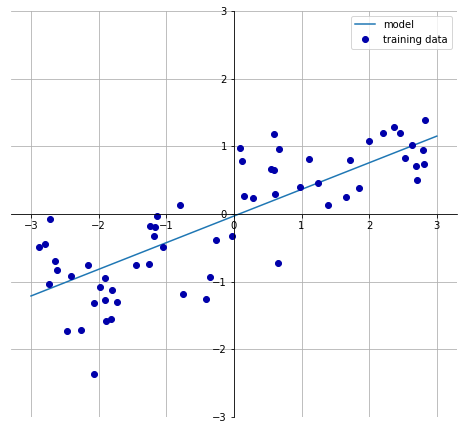

In [90]:
mglearn.plots.plot_linear_regression_wave()

- 1차원(vector) 데이터 : 점(scalar)으로 분리
- 2차원(matrix) 데이터 : 선으로 분리
- 3차원(tensor, cube) 데이터 : 면(plane)으로 분리
- 4차원(tensor) 데이터 : 공간으로 분리